In [2]:
import seaborn as sns
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import seaborn as sns
import time

In [3]:
def setting_data(data=None):
    feature_matrix = np.ones((np.ma.size(data,axis=0),np.ma.size(data,axis=1)+1))
    feature_matrix[:,1:] = data
    return feature_matrix

In [4]:
def predict_values(feature_matrix=None, weights=None):
    return np.dot(a=feature_matrix,b=weights)

In [30]:
def plynomial_features_generation(data=None, degree=0):
    return np.hstack((data,np.power(data,np.arange(start=2,stop=degree+1))))

In [6]:
def normalize_data(data=None):
    data = data.astype(float)
    for i in range(data.shape[1]):
        data[:,i] = np.divide(np.subtract(data[:,i],np.mean(data[:,i])), np.std(data[:,i])).astype(float)
    return data

In [7]:
def gradient_descent(x=None,y=None,tolerance_gradient=0.01, tolerance_cost=0.0000001,
                     step_size = 0.001, max_iter=10000):
    
    feature_matrix = setting_data(data=x)
    
    weights = np.random.rand(x.shape[1] + 1, 1)
    partials = np.zeros(x.shape[1]+1).reshape((-1,1))
    
    i = 0
    prev_cost = 10
    costs = np.array([])
    gradients = np.array([])
    
    converged = False
    while not converged:
        i += 1
        
        predicted = predict_values(feature_matrix=feature_matrix, weights=weights)
        errors = np.subtract(predicted, y)
        #Updating weights
        
        #taking derivative
        partials = np.dot(feature_matrix.T,errors)
        weights = np.subtract(weights,np.multiply(step_size,partials))
        
        gradient_magnitude = np.sqrt(np.sum(np.square(partials)))
        cur_cost = np.sum(np.square(errors))
        
        gradients = np.append(gradients,gradient_magnitude)
        costs = np.append(costs,cur_cost)
#         if i%1000==0:
#             print(cur_cost)
#         print(abs(cur_cost - prev_cost))
        if (gradient_magnitude <= tolerance_gradient) or (abs(cur_cost - prev_cost) < tolerance_cost):
            if gradient_magnitude <= tolerance_gradient:
                print('[Gradient Magnitude - Tolerance] Satisfied')
            else:
                print('[Cost Tolerance - Precision] Satisfied')
            converged = True

        if i >= max_iter:
            print('Iterations Completed')
            converged = True
        
        prev_cost = cur_cost
    return (i, weights,gradients, costs)

###### Generating Data

###### Conventions

x      = normal data (1D vector)

x_poly = dataset with specified polynomials appended as columns (Specify by Degree)

y_poly = Y generated from x_poly

x_norm = x_poly normalized

y_norm = y generated from x_norm

In [43]:
x = np.arange(-10, 11).reshape(-1,1)
y = (10 + 2*x + 5*x**2).astype(float).reshape(-1,1)

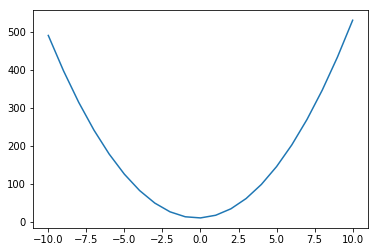

In [46]:
plt.plot(x, y)
plt.show()

Generating Polynomial Features

In [45]:
degree = 2
x_poly = plynomial_features_generation(x,degree)

Generating **Y** from plynomials of X

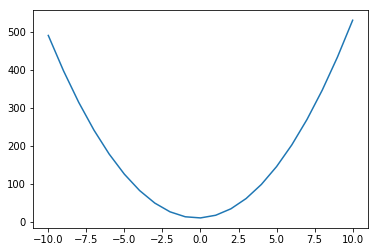

In [47]:
plt.plot(x_poly[:,0], y)
plt.show()

Normalizing Data

In [48]:
x_norm = normalize_data(x_poly)
y_norm = (10 + 2*x_norm[:,0] + 5*x_norm[:,1]**2).reshape(-1,1)

###### Running with No normalization

In [102]:
start_time = time.time()
i,cal_weights, grads, costs = gradient_descent(x=x_poly, y=y,step_size=1e-5,tolerance_cost=1e-7,
                                               tolerance_gradient=1e-7, max_iter=1e7)
end_time = time.time()

[Cost Tolerance - Precision] Satisfied


In [103]:
print('Time taken: ',end_time-start_time)
print('Iterations: ',i)
print('Calculated weights:\n',cal_weights)

Time taken:  6.6981964111328125
Iterations:  76665
Calculated weights:
 [[9.99239601]
 [2.        ]
 [5.00011558]]


Orignal weights were: 10    2    5

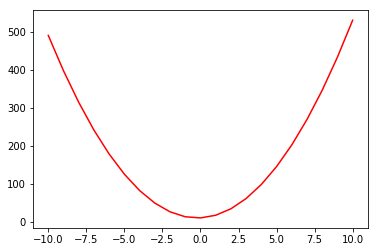

In [104]:
predicted_target_1 = (cal_weights[0] + cal_weights[1]*x_poly[:,0] + cal_weights[2]*(x_poly[:,1])).reshape(-1,1)
plt.plot(x_poly[:,0], y,'r')
plt.show()

In [ ]:
pre

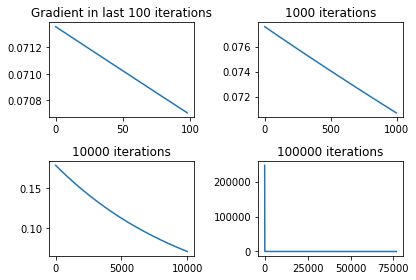

In [52]:
fig, axes = plt.subplots(2, 2)
axes[0, 0].plot(np.arange(len(grads[-100:-1])), grads[-100:-1])
axes[0,0].set_title('Gradient in last 100 iterations')
axes[0, 1].plot(np.arange(len(grads[-1000:-1])), grads[-1000:-1])
axes[0,1].set_title('1000 iterations')
axes[1, 0].plot(np.arange(len(grads[-10000:-1])), grads[-10000:-1])
axes[1,0].set_title('10000 iterations')
axes[1, 1].plot(np.arange(len(grads[-100000:-1])), grads[-100000:-1])
axes[1,1].set_title('100000 iterations')
plt.tight_layout()
plt.show()

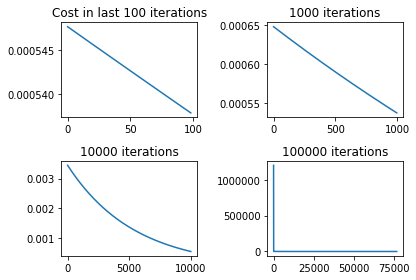

In [53]:
fig, axes = plt.subplots(2, 2)
axes[0, 0].plot(np.arange(len(costs[-100:-1])), costs[-100:-1])
axes[0, 0].set_title('Cost in last 100 iterations')
axes[0, 1].plot(np.arange(len(costs[-1000:-1])), costs[-1000:-1])
axes[0, 1].set_title('1000 iterations')
axes[1, 0].plot(np.arange(len(costs[-10000:-1])), costs[-10000:-1])
axes[1, 0].set_title('10000 iterations')
axes[1, 1].plot(np.arange(len(costs[-100000:-1])), costs[-100000:-1])
axes[1, 1].set_title('100000 iterations')
plt.tight_layout()
plt.show()

###### Running with Nomalization

In [105]:
start_time = time.time()
i,cal_weights, grads, costs = gradient_descent(x=x_norm, y=y_norm,step_size=1e-5,tolerance_cost=1e-80,
                                               tolerance_gradient=1e-7, max_iter=1e7)
end_time = time.time()

[Cost Tolerance - Precision] Satisfied


In [106]:
print('Time taken: ',end_time-start_time)
print('Iterations: ',i)
print('Calculated weights:\n',cal_weights)

Time taken:  5.9171411991119385
Iterations:  70448
Calculated weights:
 [[14.99999454]
 [ 1.99999943]
 [ 3.0960553 ]]


Orignal weights were 10 2 5

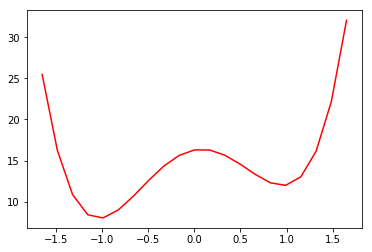

In [107]:
predicted_target_2 = (cal_weights[0] + cal_weights[1]*x_norm[:,0] + cal_weights[2]*(x_norm[:,1])).reshape(-1,1)
plt.plot(x_norm[:,0], y_norm,'r')
plt.show()

Comparing to orignal curve!

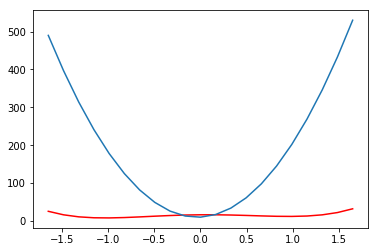

In [63]:
predicted_target = (cal_weights[0] + cal_weights[1]*x_norm[:,0] + cal_weights[2]*(x_norm[:,1])).reshape(-1,1)
plt.plot(x_norm[:,0], y_norm,'r')
plt.plot(x_norm[:,0],y)
plt.show()

This is because we first generated polynomial features and then we scaled them. What caused this trouble was, that way we lost the relationship between polynomial features [Don't forget: They all were created from one variable 'x']. We need to retain this relationship, for that, better approach would be first scalling the base feature 'x' then generating it's polynomial features!

###### Scaling before Polynomial feature generation.

In [64]:
x_temp_norm = normalize_data(x)
x_temp_norm_poly = plynomial_features_generation(x_temp_norm,2)
y_temp_norm_poly = (10 + 2*x_temp_norm_poly[:,0] + 5*(x_temp_norm_poly[:,1])).reshape(-1,1)

X (Polynomails after scaling) with Y (Generated from unscaled X)

In [108]:
start_time = time.time()
i,cal_weights, grads, costs = gradient_descent(x=x_temp_norm_poly, y=y,step_size=1e-5,tolerance_cost=1e-7,
                                               tolerance_gradient=1e-7, max_iter=1e7)
end_time = time.time()

[Cost Tolerance - Precision] Satisfied


In [109]:
print('Time taken: ',end_time-start_time)
print('Iterations: ',i)
print('Calculated weights:\n',cal_weights)

Time taken:  17.66818356513977
Iterations:  135078
Calculated weights:
 [[ 10.00867104]
 [ 12.11060142]
 [183.32744786]]


Orignal weights were 10 2 5

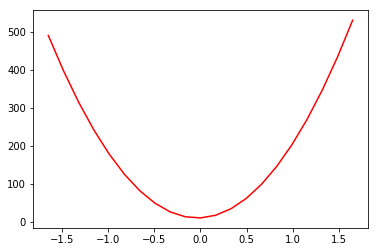

In [110]:
predicted_target_3 = (cal_weights[0] + cal_weights[1]*x_temp_norm_poly[:,0] + cal_weights[2]*(x_temp_norm_poly[:,1])).reshape(-1,1)
plt.plot(x_temp_norm_poly[:,0], y,'r')
plt.show()

X (Polynomial Generation after scaling) with Y (Generated from scaled X)

In [111]:
start_time = time.time()
i,cal_weights, grads, costs = gradient_descent(x=x_temp_norm_poly, y=y_temp_norm_poly,step_size=1e-5,tolerance_cost=1e-7,
                                               tolerance_gradient=1e-7, max_iter=1e7)
end_time = time.time()

[Cost Tolerance - Precision] Satisfied


In [112]:
print('Time taken: ',end_time-start_time)
print('Iterations: ',i)
print('Calculated weights:\n',cal_weights)

Time taken:  9.361355543136597
Iterations:  91840
Calculated weights:
 [[9.99132865]
 [2.        ]
 [5.00588568]]


Orignal weights were 10 2 5

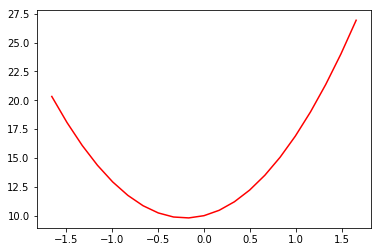

In [114]:
predicted_target_4 = (cal_weights[0] + cal_weights[1]*x_temp_norm_poly[:,0] + cal_weights[2]*(x_temp_norm_poly[:,1])).reshape(-1,1)
plt.plot(x_temp_norm_poly[:,0], y_temp_norm_poly,'r')
plt.show()